In [1]:
#http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html

In [2]:
housing <- read.csv("Rgraphics/dataSets/landdata-states.csv")
head(housing[1:5])

State region Date    Home.Value Structure.Cost
1 AK    West   2010.25 224952     160599        
2 AK    West   2010.50 225511     160252        
3 AK    West   2009.75 225820     163791        
4 AK    West   2010.00 224994     161787        
5 AK    West   2008.00 234590     155400        
6 AK    West   2008.25 233714     157458

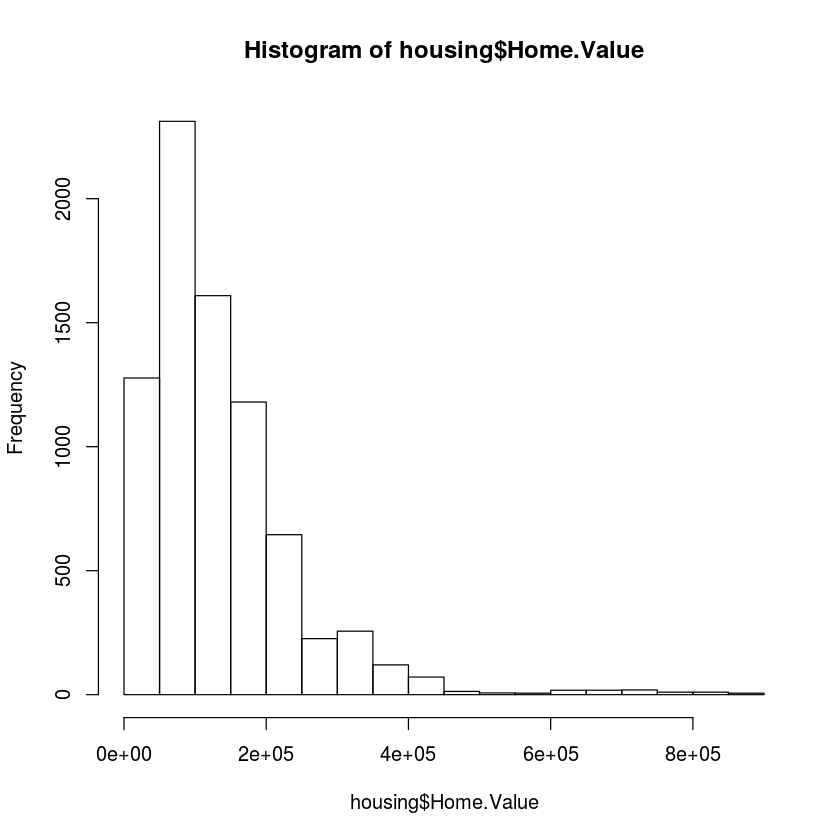

In [3]:
hist(housing$Home.Value)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


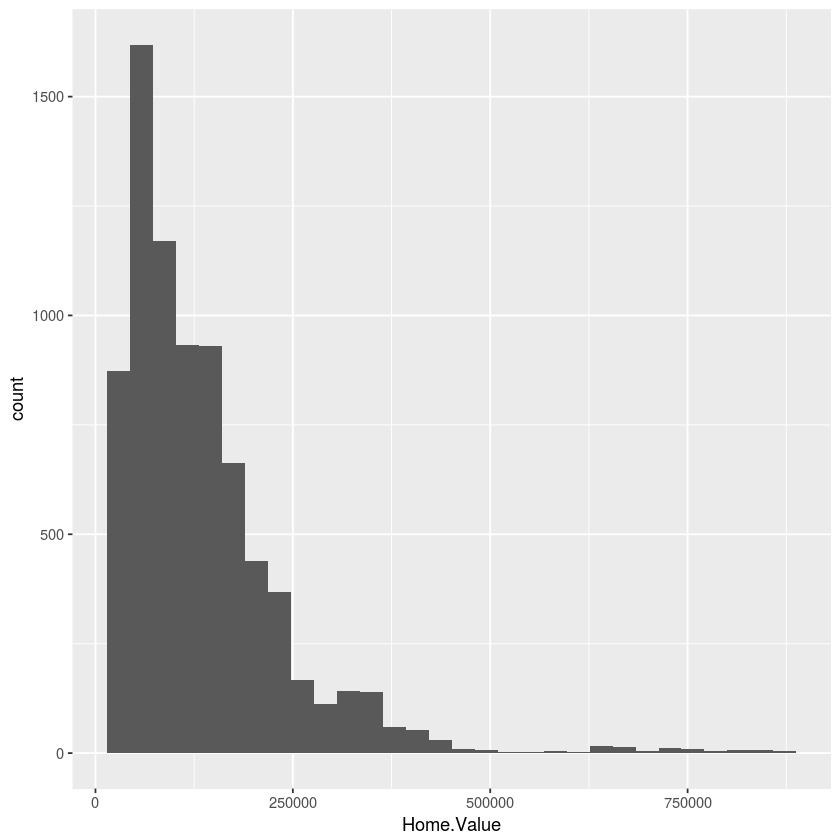

In [4]:
library(ggplot2)
ggplot(housing, aes(x = Home.Value)) + geom_histogram()

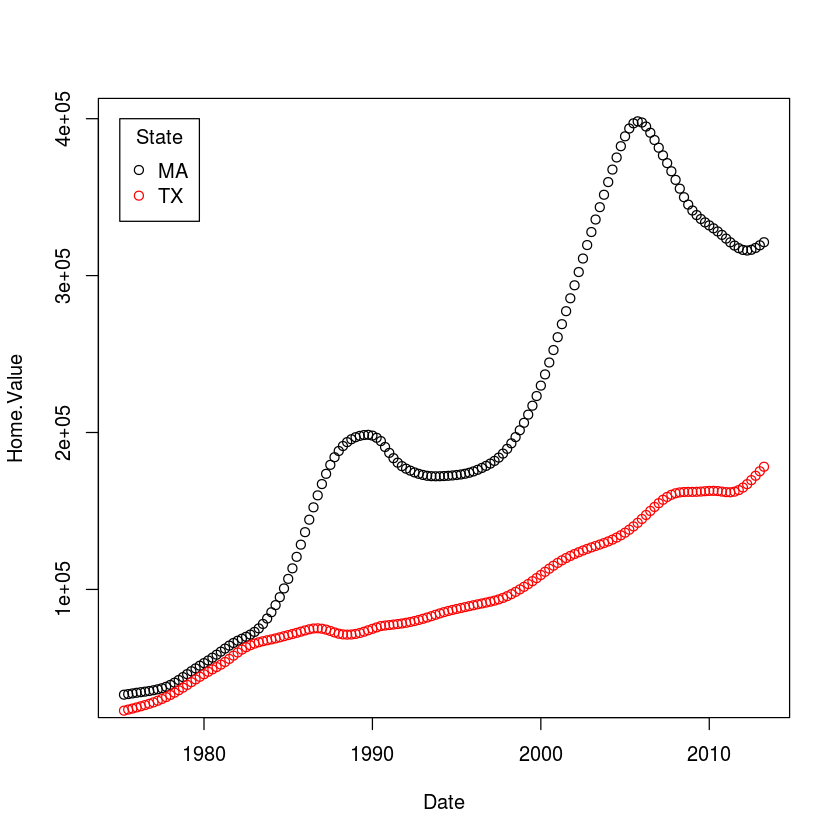

In [5]:
plot(Home.Value ~ Date,
     data=subset(housing, State == "MA"))
points(Home.Value ~ Date, col="red",
       data=subset(housing, State == "TX"))
legend(1975, 400000,
       c("MA", "TX"), title="State",
       col=c("black", "red"),
       pch=c(1, 1))

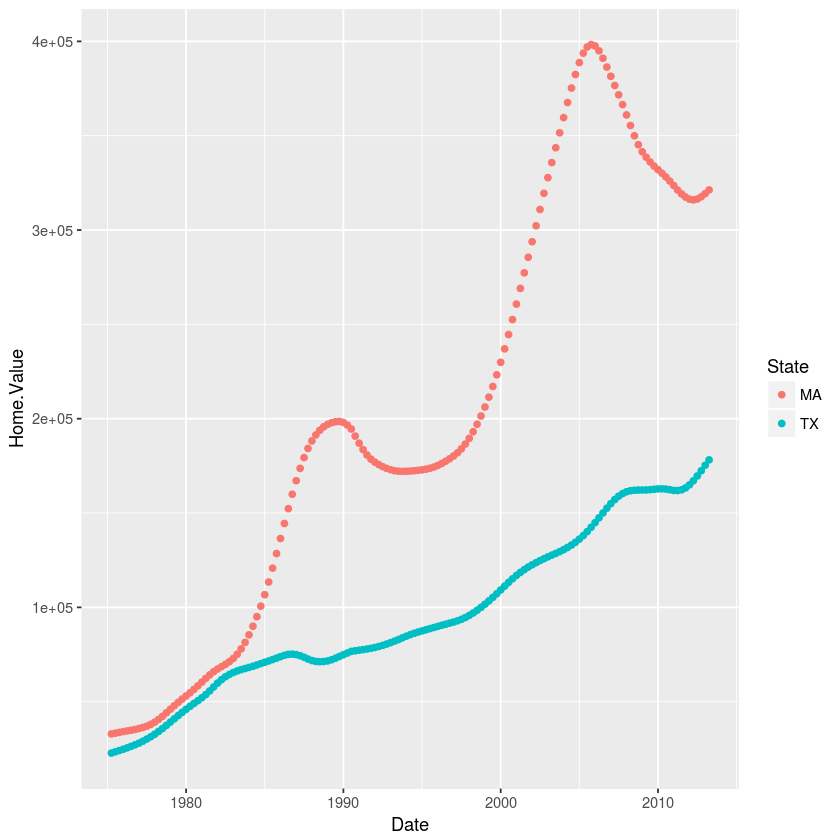

In [6]:
ggplot(subset(housing, State %in% c("MA", "TX")),
       aes(x=Date,
           y=Home.Value,
           color=State))+
  geom_point()

In [7]:
help.search("geom_", package = "ggplot2")

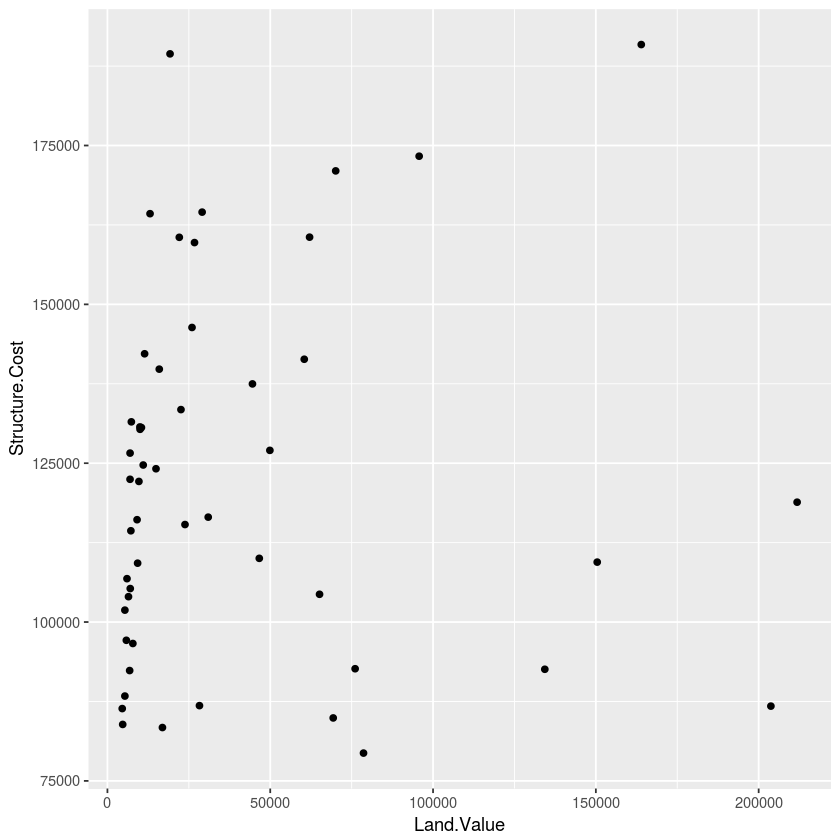

In [8]:
hp2001Q1 <- subset(housing, Date == 2001.25) 
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = Land.Value)) +
  geom_point()

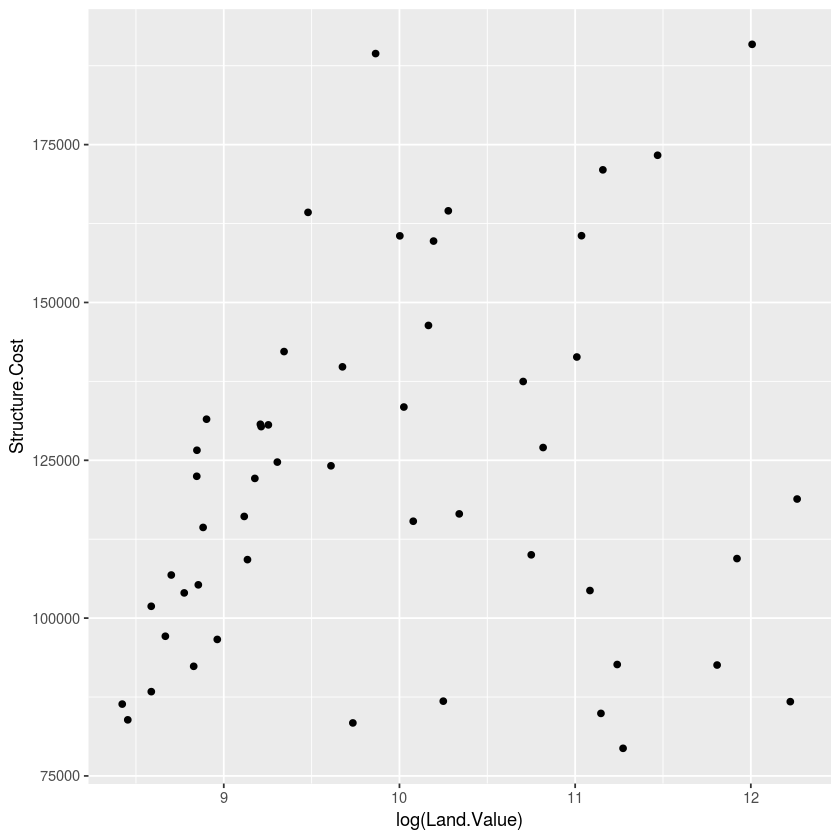

In [9]:
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = log(Land.Value))) +
  geom_point()

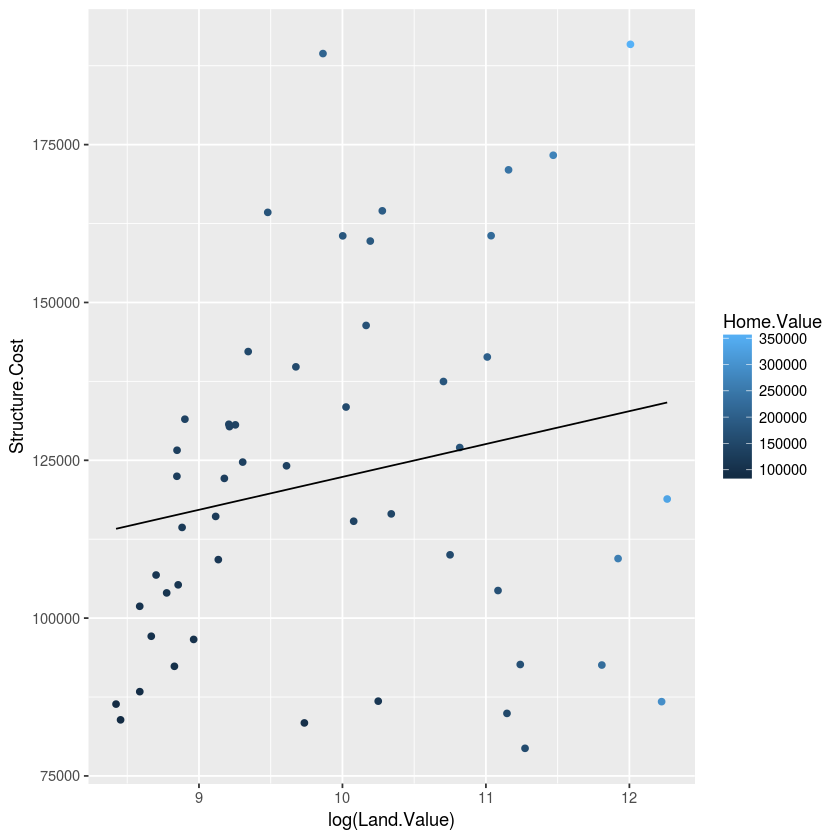

In [10]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))

p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))

p1 + geom_point(aes(color = Home.Value)) +
  geom_line(aes(y = pred.SC))

`geom_smooth()` using method = 'loess'


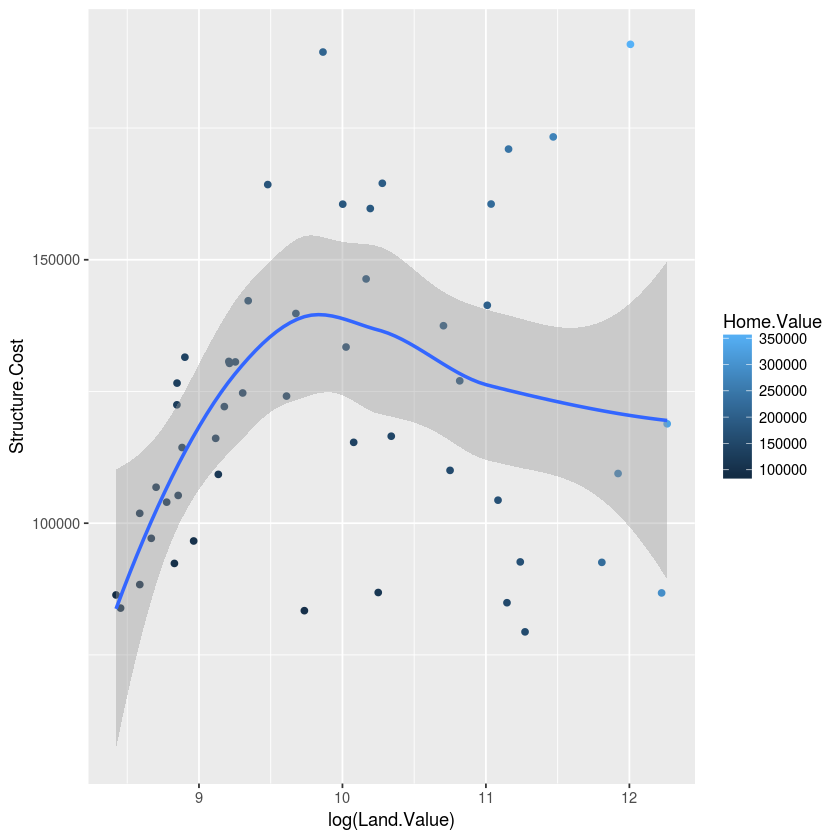

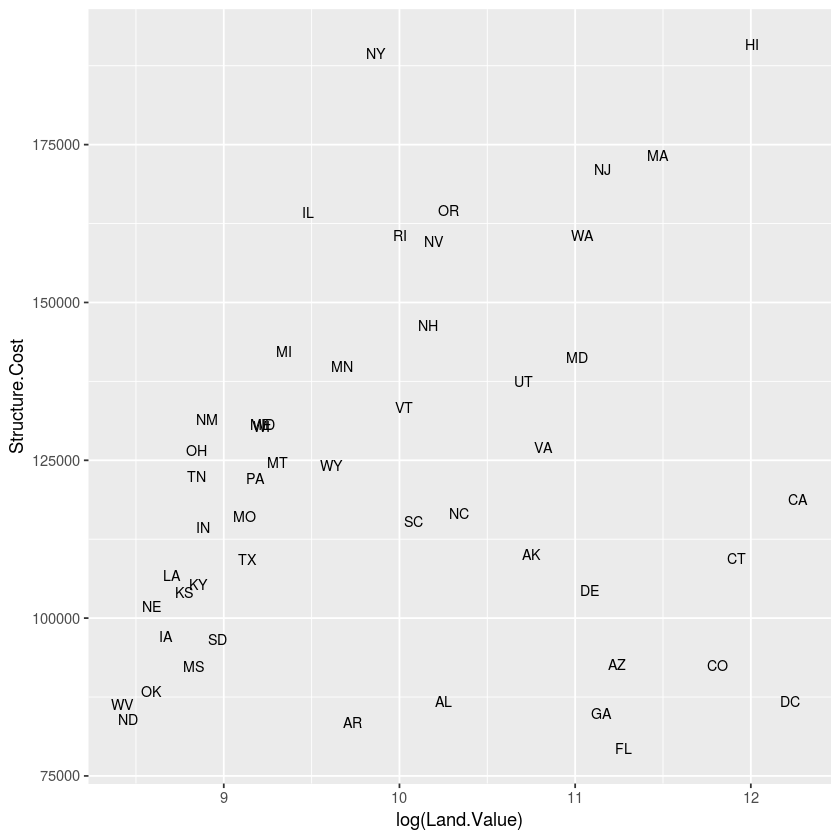

In [11]:
p1 +
  geom_point(aes(color = Home.Value)) +
  geom_smooth()


p1 + 
  geom_text(aes(label=State), size = 3)

[1] "/home/sunil/anaconda3/lib/R/library"

[1] "/home/sunil/WorkSpace/R/DIC_Lab3"

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


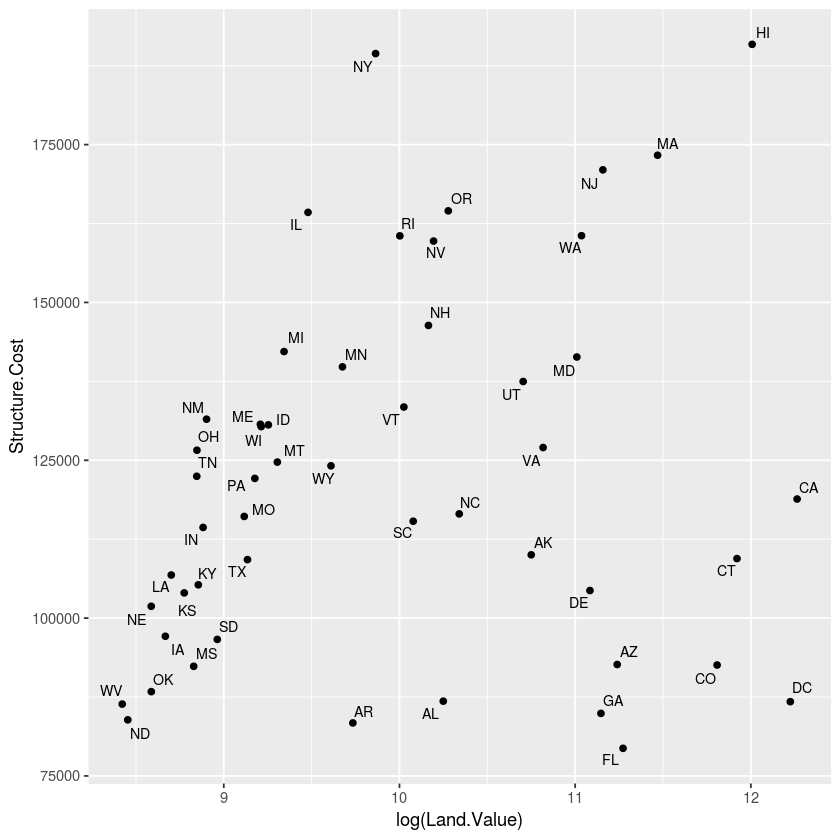

In [12]:
.libPaths()
getwd()
#install.packages("stringi")
#install.packages("pacman")
#install.packages("devtools")
install.packages("ggrepel")
#install.packages("ggrepel", "/home/sunil/anaconda3/lib/R/library/", repos='http://cran.us.r-project.org')
#install.packages("ggrepel",repos="http://cran.us.r-project.org/")
#devtools::install_github("slowkow/ggrepel",lib="/home/sunil/anaconda3/lib/R/library/")
#install.packages("ggrepel", lib="/home/sunil/anaconda3/lib/R/library/")
#devtools::install_github("slowkow/ggrepel")
library("ggrepel")
p1 + 
  geom_point() + 
  geom_text_repel(aes(label=State), size = 3)

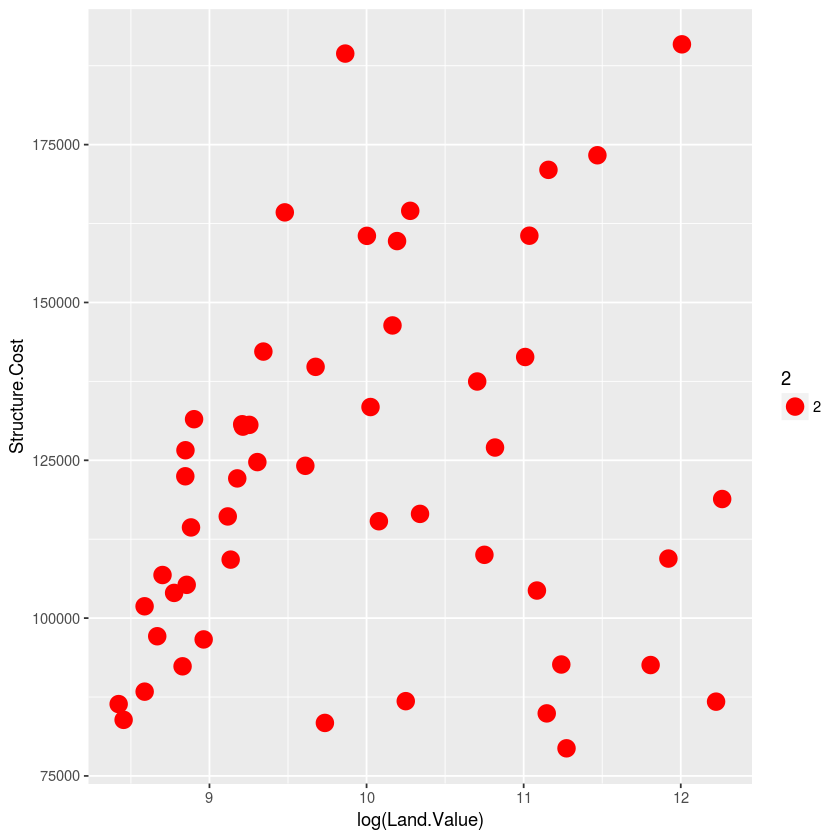

In [13]:
p1 +
  geom_point(aes(size = 2),# incorrect! 2 is not a variable
             color="red") # this is fine -- all points red

Warning message:
“Removed 1 rows containing missing values (geom_point).”

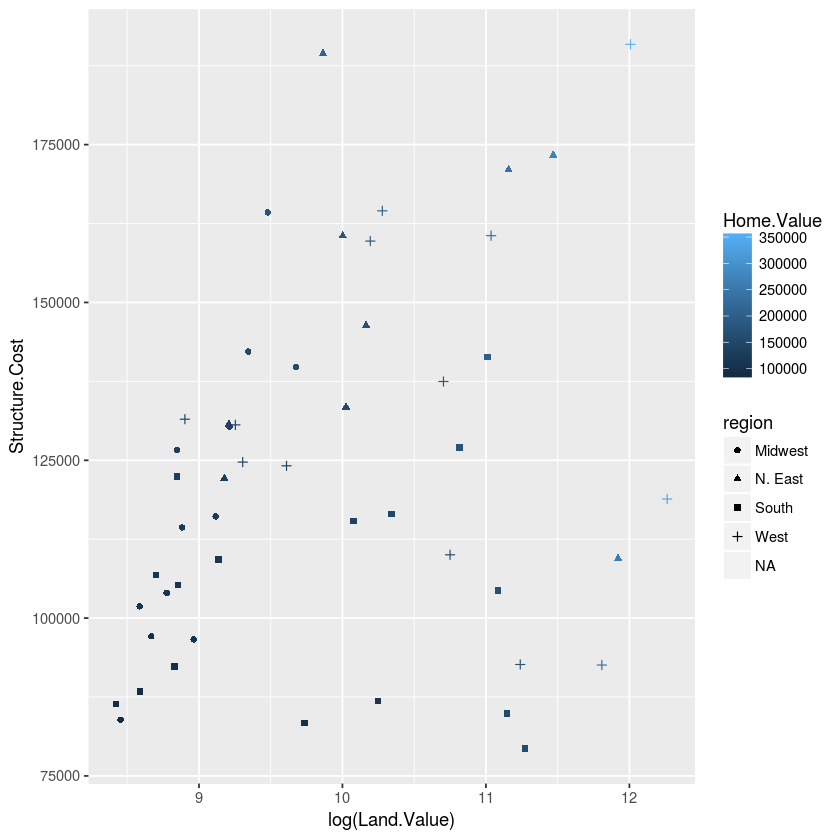

In [14]:
p1 +
  geom_point(aes(color=Home.Value, shape = region))

X Country     HDI.Rank HDI   CPI Region           
1 1 Afghanistan 172      0.398 1.5 Asia Pacific     
2 2 Albania      70      0.739 3.1 East EU Cemt Asia
3 3 Algeria      96      0.698 2.9 MENA             
4 4 Angola      148      0.486 2.0 SSA              
5 5 Argentina    45      0.797 3.0 Americas         
6 6 Armenia      86      0.716 2.6 East EU Cemt Asia

function (mapping = NULL, data = NULL, stat = "bin", position = "stack", 
    ..., binwidth = NULL, bins = NULL, na.rm = FALSE, show.legend = NA, 
    inherit.aes = TRUE) 
NULL

function (mapping = NULL, data = NULL, geom = "bar", position = "stack", 
    ..., binwidth = NULL, bins = NULL, center = NULL, boundary = NULL, 
    breaks = NULL, closed = c("right", "left"), pad = FALSE, 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

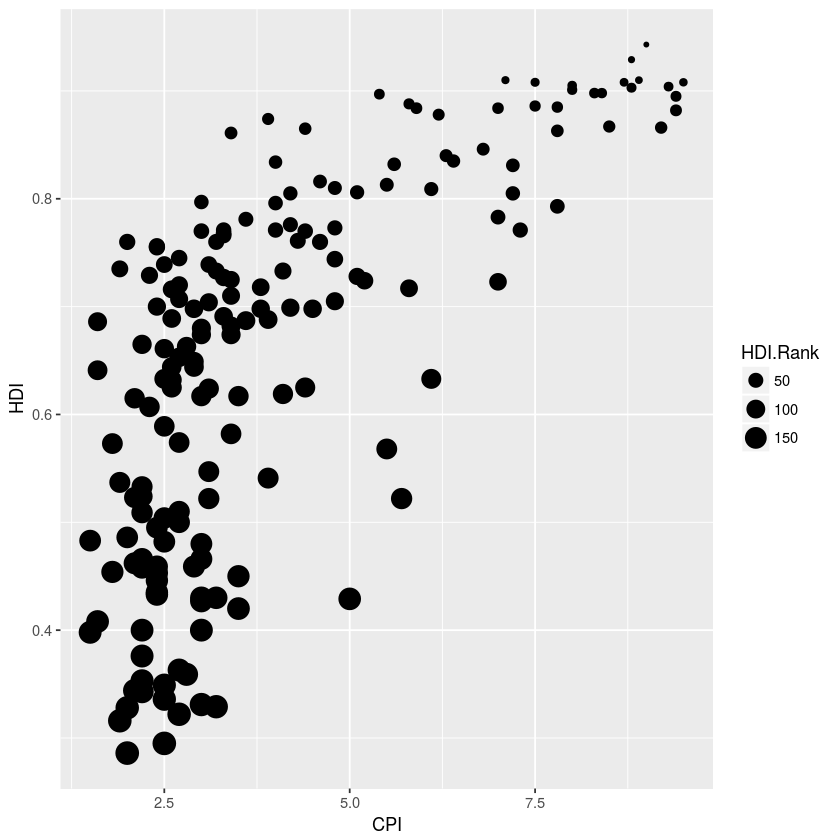

In [15]:
dat <- read.csv("Rgraphics/dataSets/EconomistData.csv")
head(dat)

ggplot(dat, aes(x = CPI, y = HDI, size = HDI.Rank)) + geom_point()

args(geom_histogram)
args(stat_bin)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


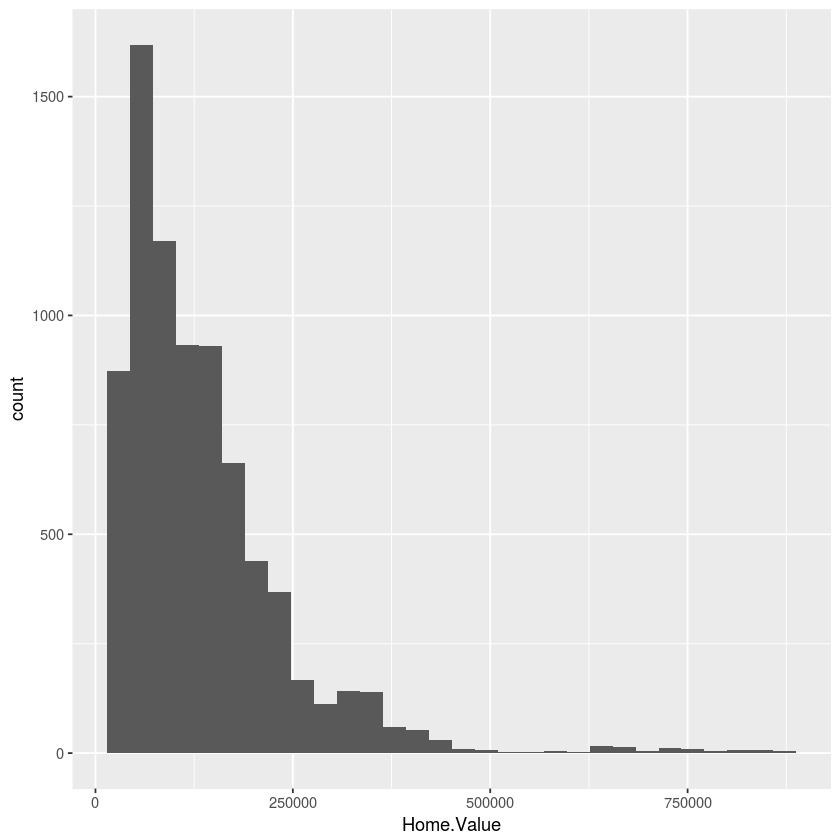

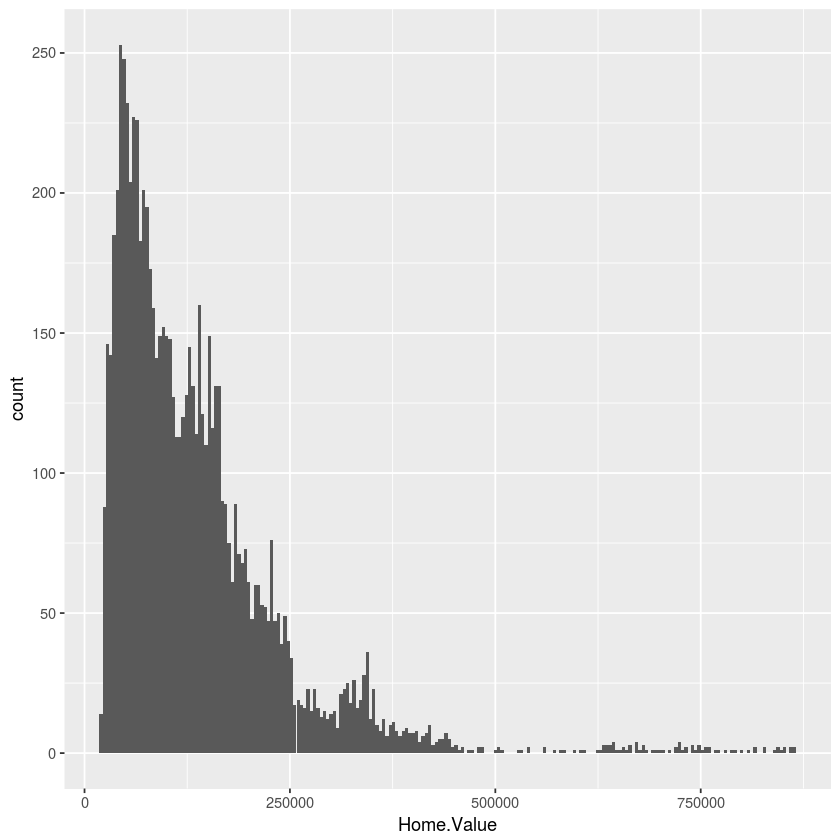

In [16]:
p2 <- ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()

p2 + geom_histogram(stat = "bin", binwidth=4000)

State Home.Value
1  AK    147385.14 
2  AL     92545.22 
3  AR     82076.84 
4  AZ    140755.59 
5  CA    282808.08 
6  CO    158175.99 
46 VA    155391.44 
47 VT    132394.60 
48 WA    178522.58 
49 WI    108359.45 
50 WV     77161.71 
51 WY    122897.25

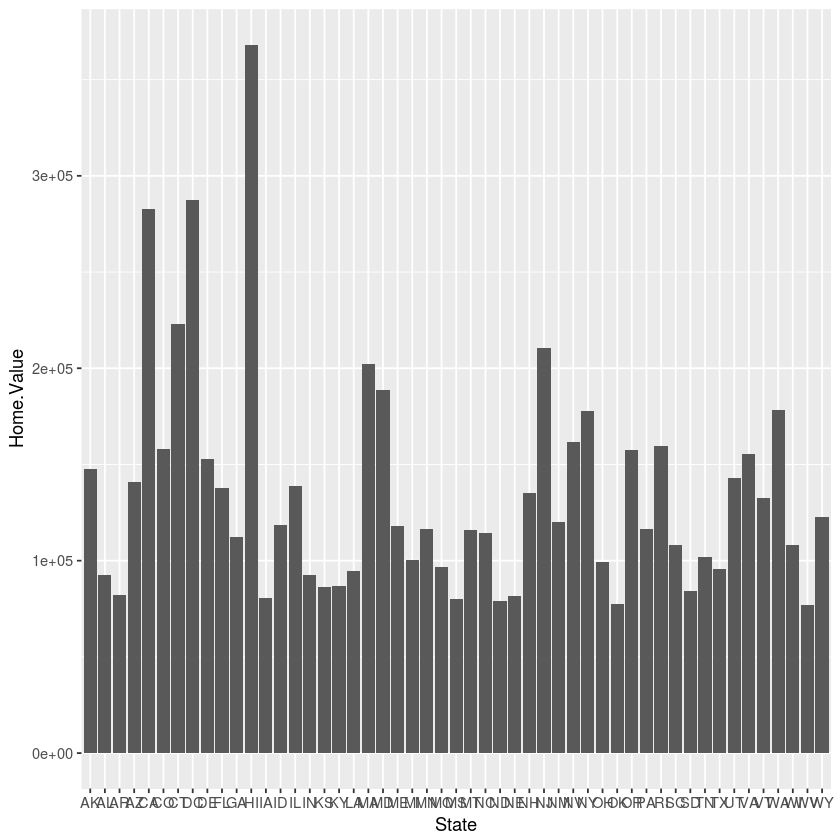

In [17]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
rbind(head(housing.sum), tail(housing.sum))


ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar(stat="identity")


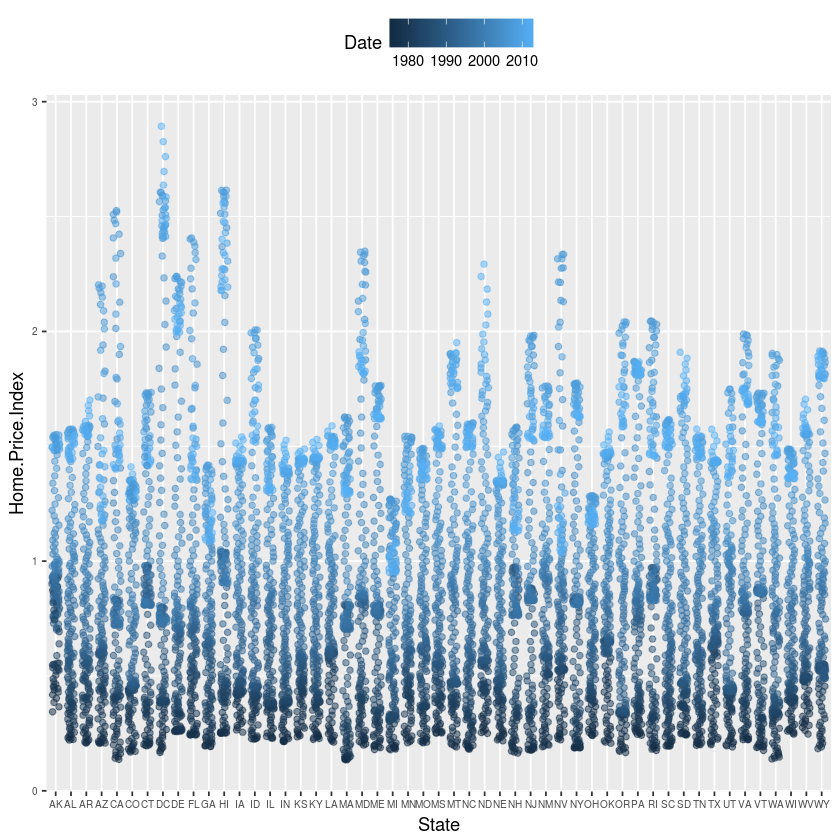

In [18]:
#### Exercise II ####
p3 <- ggplot(housing,
             aes(x = State,
                 y = Home.Price.Index)) + 
        theme(legend.position="top",
              axis.text=element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date),
                       alpha = 0.5,
                       size = 1.5,
                       position = position_jitter(width = 0.25, height = 0)))



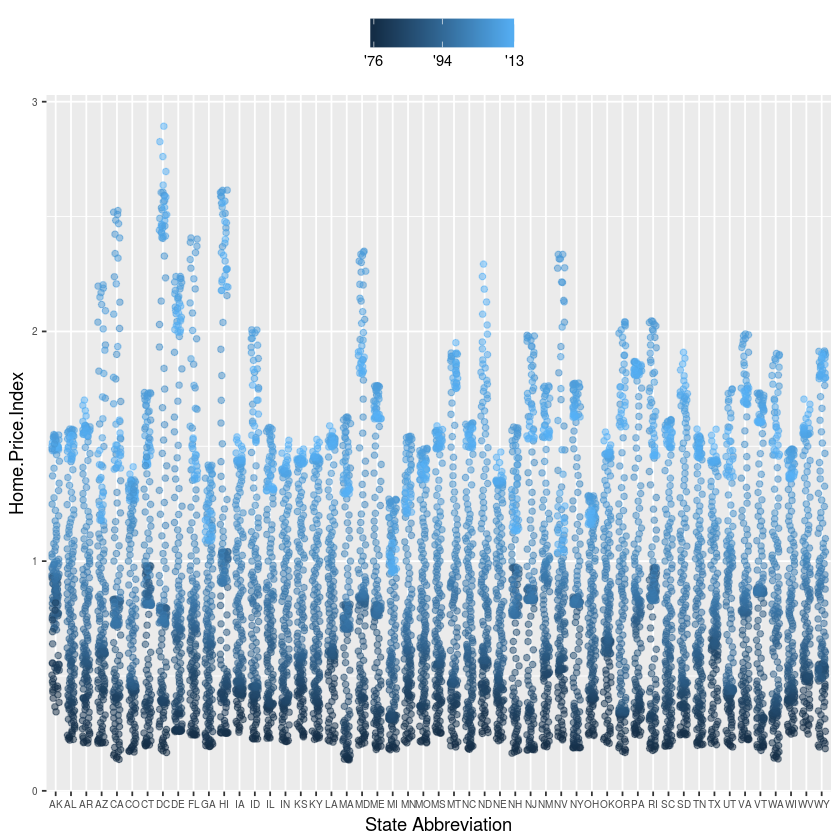

In [19]:
p4 + scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"))

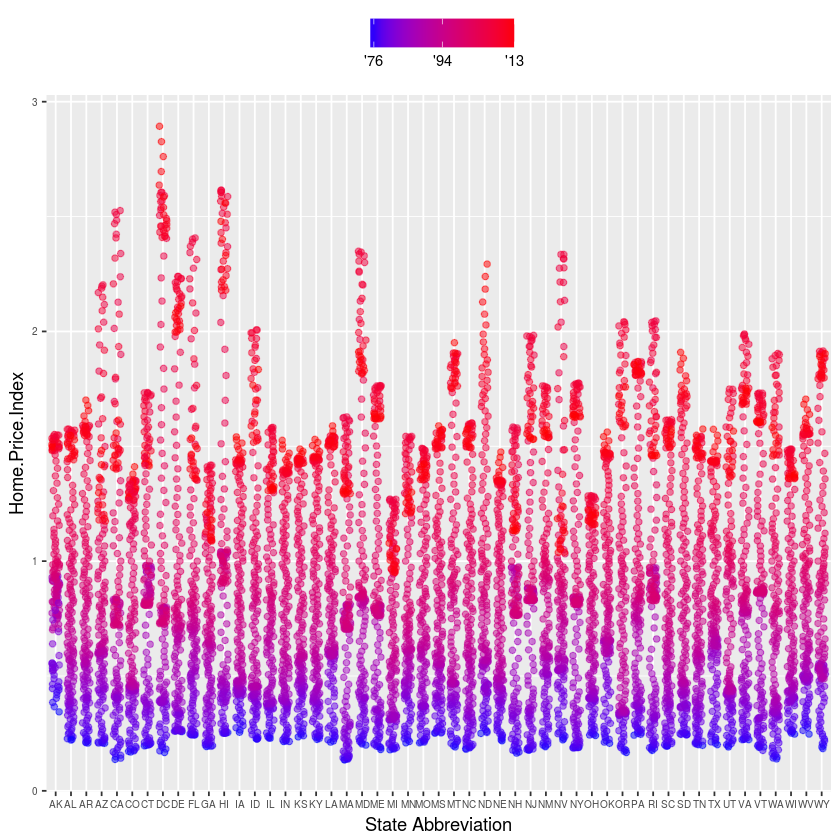

In [20]:
p4 +
  scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high = "red")


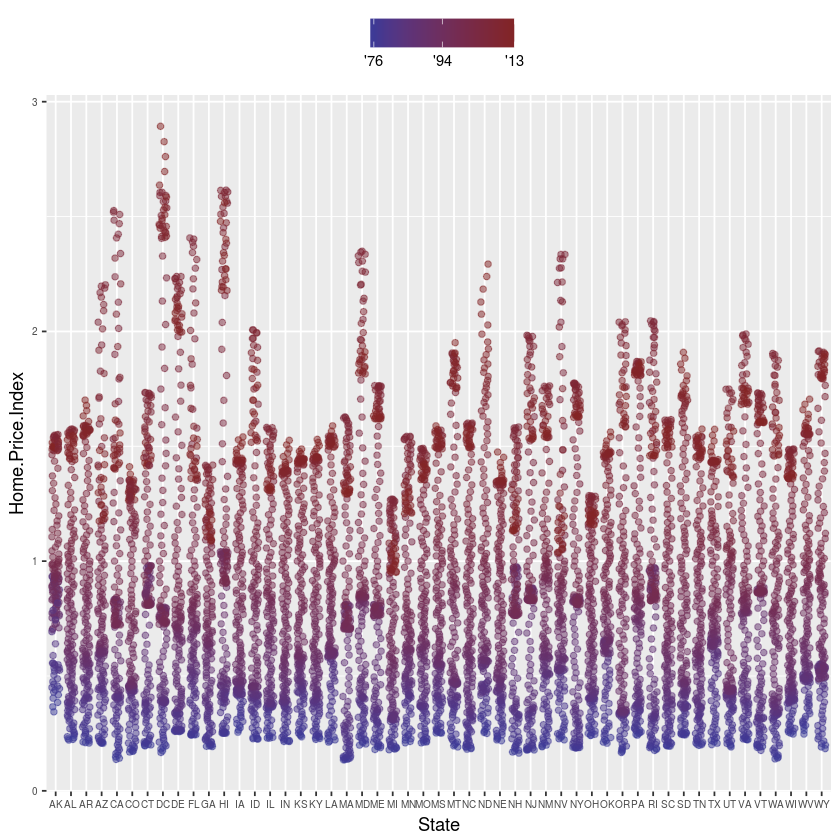

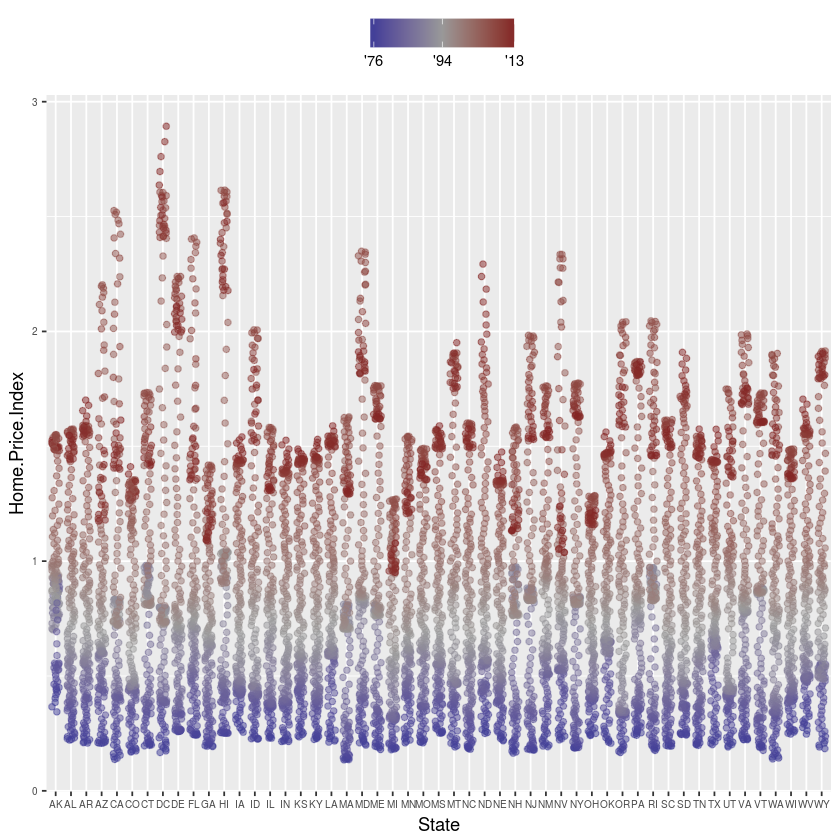

In [21]:
library(scales)
p4 +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = muted("blue"), high = muted("red"))

p4 +
  scale_color_gradient2(name="",
                        breaks = c(1976, 1994, 2013),
                        labels = c("'76", "'94", "'13"),
                        low = muted("blue"),
                        high = muted("red"),
                        mid = "gray60",
                        midpoint = 1994)

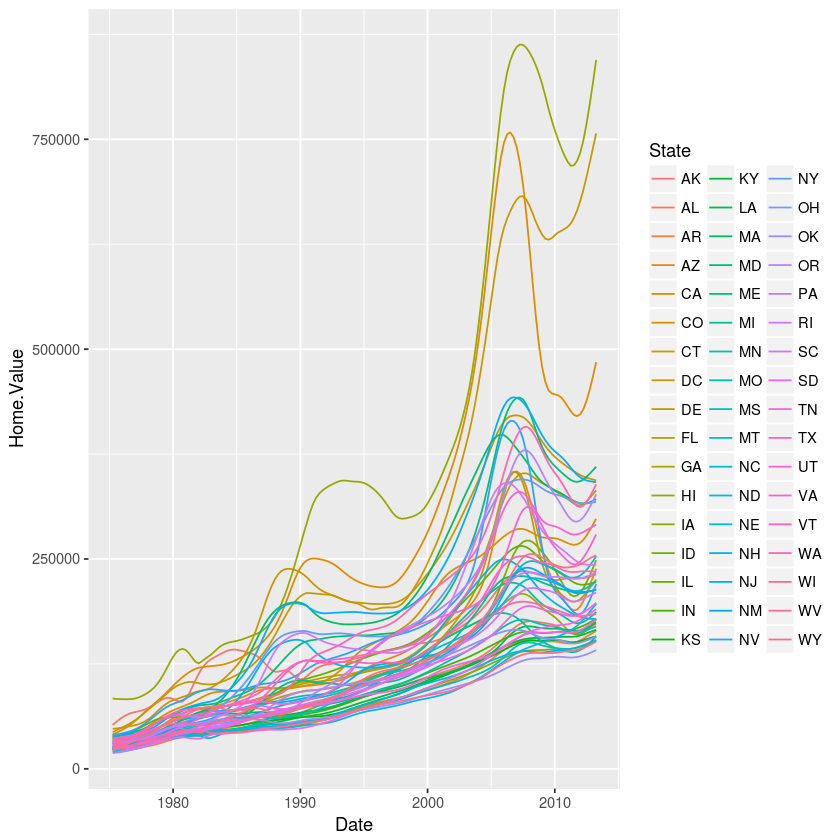

In [22]:
#### Exercise III ####

p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

theme_linedraw

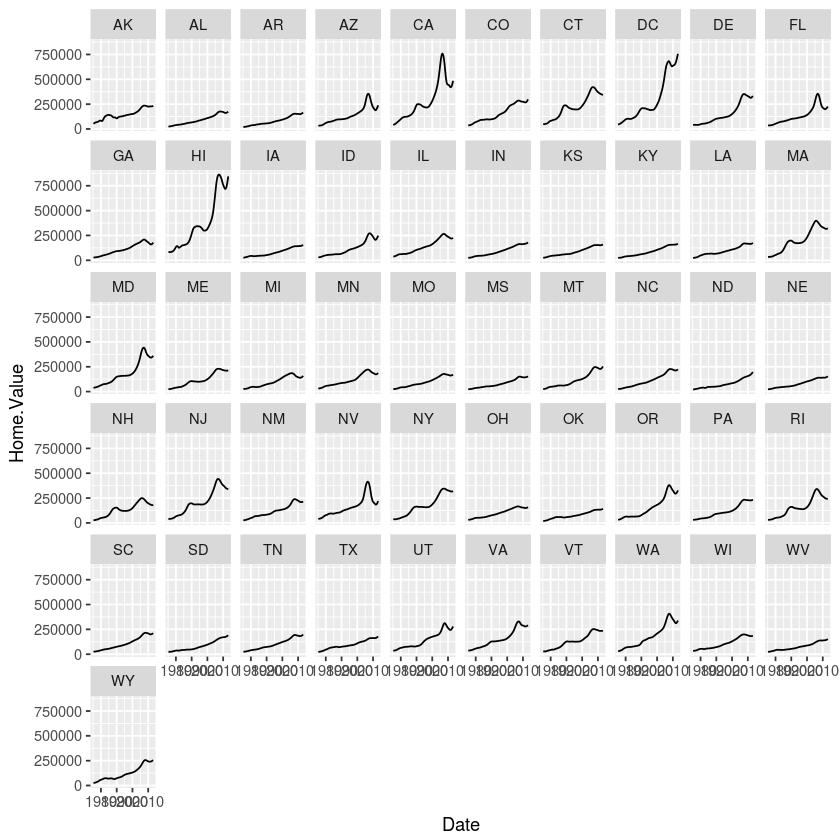

theme_light

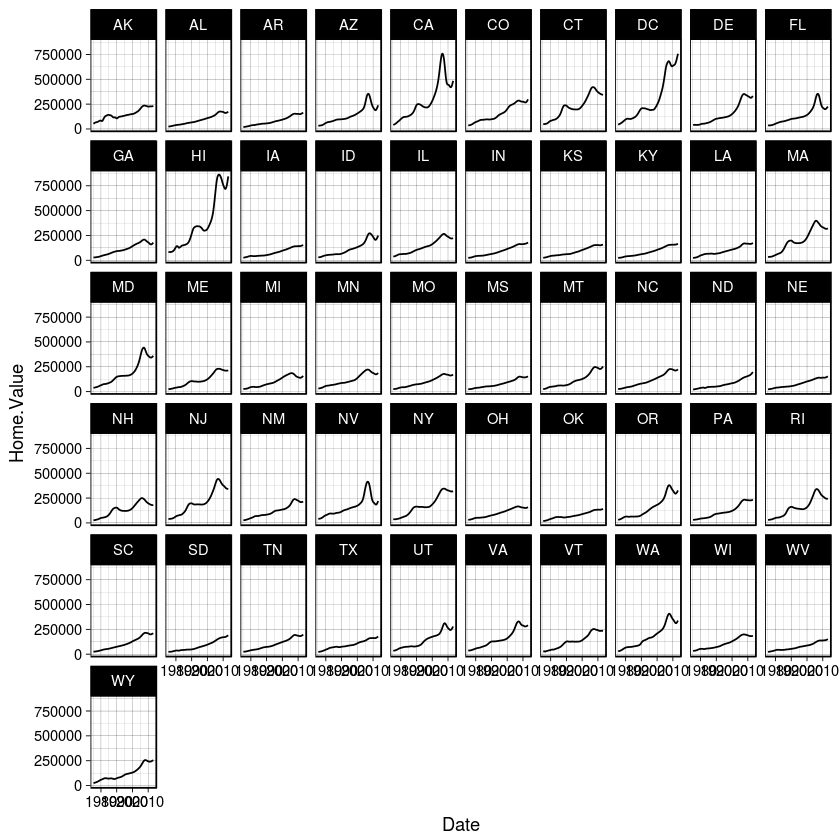

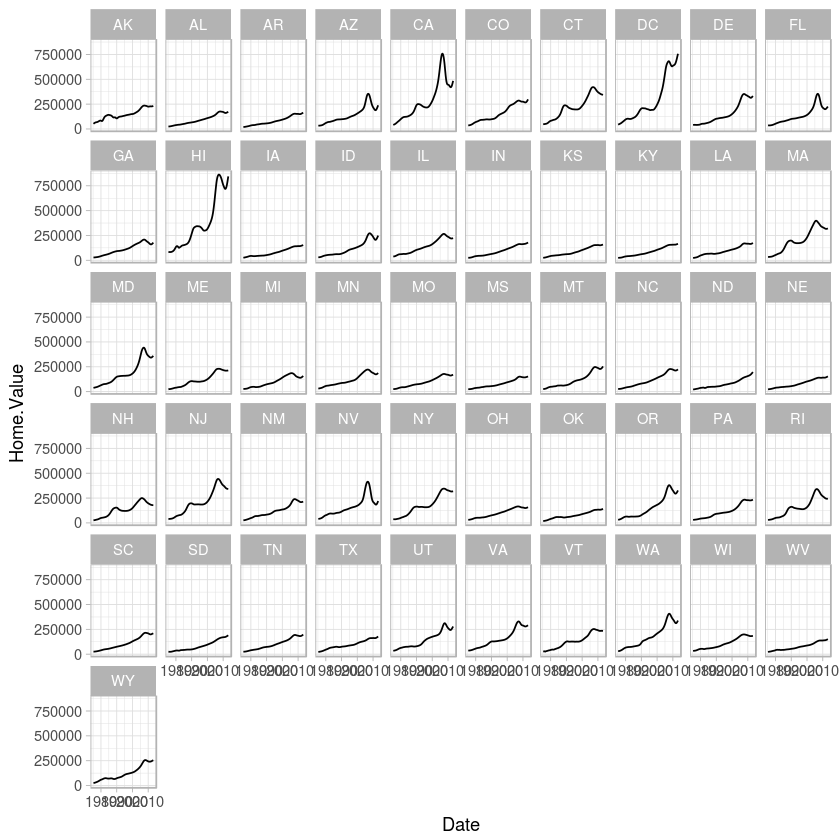

In [23]:
(p5 <- p5 + geom_line() +
   facet_wrap(~State, ncol = 10))


cat ('theme_linedraw')
p5 + theme_linedraw()

cat('theme_light')
p5 + theme_light()

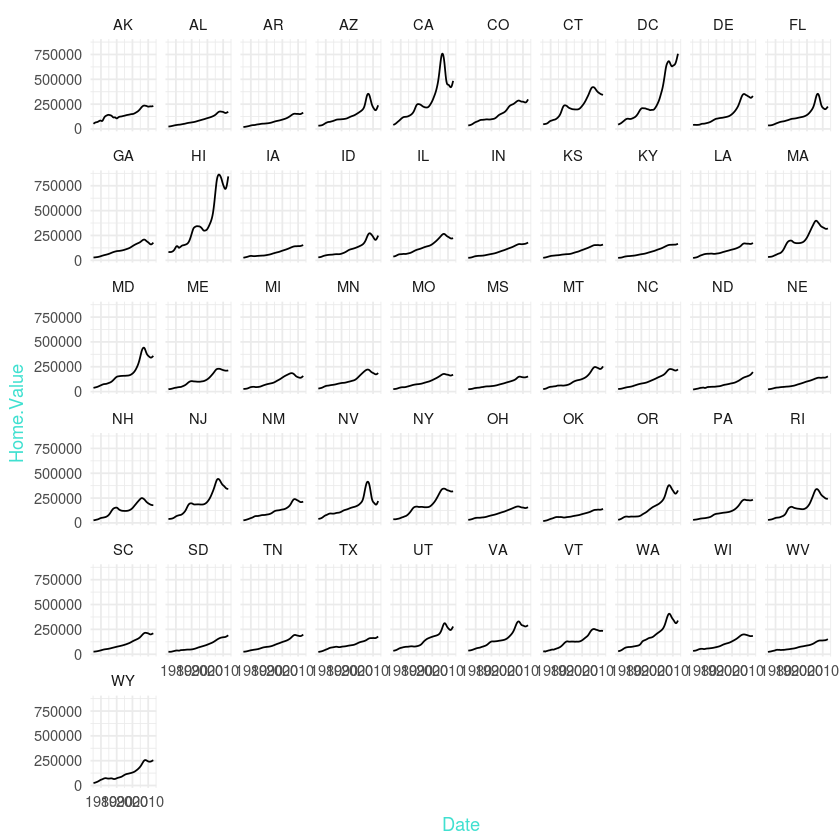

In [24]:
p5 + theme_minimal() +
  theme(text = element_text(color = "turquoise"))

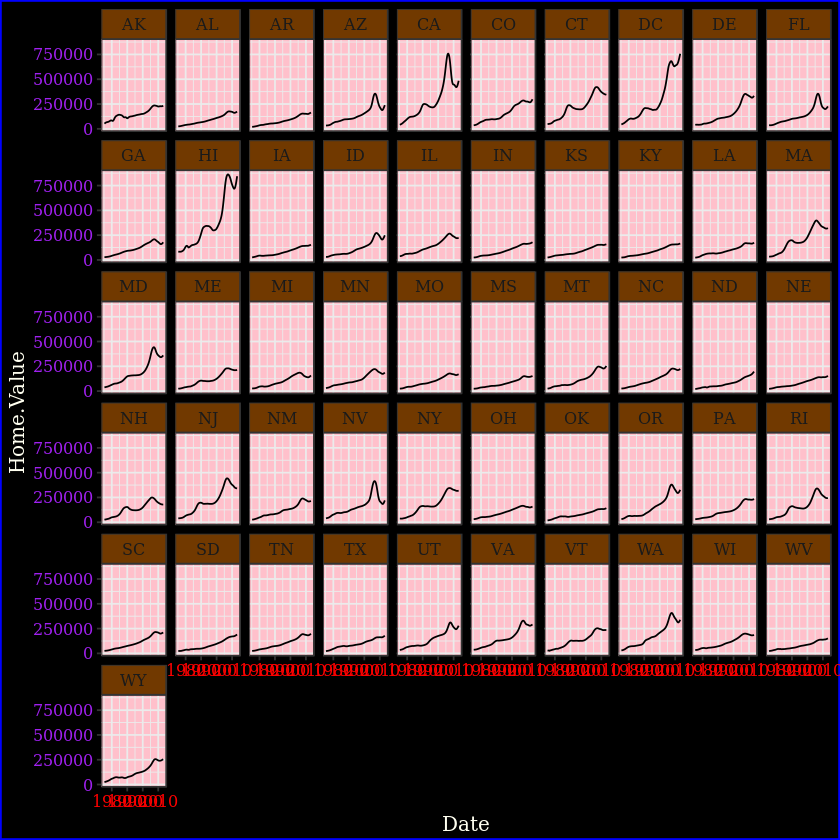

In [25]:
theme_new <- theme_bw() +
  theme(plot.background = element_rect(size = 1, color = "blue", fill = "black"),
        text=element_text(size = 12, family = "Serif", color = "ivory"),
        axis.text.y = element_text(colour = "purple"),
        axis.text.x = element_text(colour = "red"),
        panel.background = element_rect(fill = "pink"),
        strip.background = element_rect(fill = muted("orange")))

p5 + theme_new

In [26]:
#install.packages("tidyr", repos="http://cran.us.r-project.org/")
library(tidyr)
home.land.byyear <- gather(housing.byyear,
                           value = "value",
                           key = "type",
                           Home.Value, Land.Value)
ggplot(home.land.byyear,
       aes(x=Date,
           y=value,
           color=type)) +
  geom_line()


ERROR: Error in is.data.frame(x): object 'housing.byyear' not found


In [ ]:
#Reference- http://databeauty.com/blog/tutorial/2017/03/03/recreate-economist-graph-by-ggplot2.html
dat <- read.csv("Rgraphics/dataSets/EconomistData.csv")

  pc1 <- ggplot(dat, aes(x = CPI, y = HDI, color = Region))
  pc1 + geom_point()

In [ ]:
(pc2 <- pc1 +
     geom_smooth(aes(group = 1),
                 method = "lm",
                 formula = y ~ log(x),
                 se = FALSE,
                 color = "red")) +
     geom_point()

In [ ]:
 # A look at all 25 symbols
  df2 <- data.frame(x = 1:5 , y = 1:25, z = 1:25)
  s <- ggplot(df2, aes(x = x, y = y))
  s + geom_point(aes(shape = z), size = 4) + scale_shape_identity()
  # While all symbols have a foreground colour, symbols 19-25 also take a
  # background colour (fill)
  s + geom_point(aes(shape = z), size = 4, colour = "Red") +
    scale_shape_identity()
  s + geom_point(aes(shape = z), size = 4, colour = "Red", fill = "Black") +
    scale_shape_identity()

In [ ]:
pc2 +
    geom_point(shape = 1, size = 4)

In [ ]:
(pc3 <- pc2 +
     geom_point(size = 4.5, shape = 1) +
     geom_point(size = 4, shape = 1) +
     geom_point(size = 3.5, shape = 1))

In [ ]:
pointsToLabel <- c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                     "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
                     "India", "Italy", "China", "South Africa", "Spane",
                     "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France",
                     "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                     "New Zealand", "Singapore")

(pc4 <- pc3 +
    geom_text(aes(label = Country),
              color = "gray20",
              data = subset(dat, Country %in% pointsToLabel)))

In [ ]:
library("ggrepel")
  pc3 +
    geom_text_repel(aes(label = Country),
              color = "gray20",
              data = subset(dat, Country %in% pointsToLabel),
              force = 10)

In [ ]:
dat$Region <- factor(dat$Region,
                       levels = c("EU W. Europe",
                                  "Americas",
                                  "Asia Pacific",
                                  "East EU Cemt Asia",
                                  "MENA",
                                  "SSA"),
                       labels = c("OECD",
                                  "Americas",
                                  "Asia &\nOceania",
                                  "Central &\nEastern Europe",
                                  "Middle East &\nnorth Africa",
                                  "Sub-Saharan\nAfrica"))

In [ ]:
pc4$data <- dat
  pc4

library(grid)
  (pc5 <- pc4 +
    scale_x_continuous(name = expression(italic("Corruption Perceptions Index, 2011 (10=least corrupt)")),
                       limits = c(.9, 10.5),
                       breaks = 1:10) +
    scale_y_continuous(name = expression(italic("Human Development Index, 2011 (1=Best)")),
                       limits = c(0.2, 1.0),
                       breaks = seq(0.2, 1.0, by = 0.1)) +
    scale_color_manual(name = "",
                       values = c("#24576D",
                                  "#099DD7",
                                  "#28AADC",
                                  "#248E84",
                                  "#F2583F",
                                  "#96503F")) +
    ggtitle("Corruption and Human development"))

In [ ]:
(pc6 <- pc5 +
    theme_minimal() + # start with a minimal theme and add what we need
    theme(text = element_text(color = "gray20"),
          legend.position = "top", # position the legend in the upper left 
          legend.direction = "horizontal",
          legend.justification = c(0.1,0), # anchor point for legend.position.
          legend.text = element_text(size = 11, color = "gray10"),
          axis.text = element_text(face = "italic"),
          axis.title.x = element_text(vjust = -1), # move title away from axis
          axis.title.y = element_text(vjust = 2), # move away for axis
          axis.ticks.y = element_blank(), # element_blank() is how we remove elements
          axis.line = element_line(color = "gray40", size = 0.5),
          axis.line.y = element_blank(),
          panel.grid.major = element_line(color = "gray50", size = 0.5),
          panel.grid.major.x = element_blank()
    ) + guides(colour = guide_legend(nrow = 1))) # forces legend to be in a single line

In [ ]:
(mR2 <- summary(lm(HDI ~ log(CPI), data = dat))$r.squared)

library(grid)
  png(file = "economist.png", width = 800, height = 600)
  pc6 
  grid.text("Sources: Transparency International; UN Human Development Report",
           x = .02, y = .03,
           just = "left",
           draw = TRUE)
  grid.segments(x0 = 0.81, x1 = 0.825,
                y0 = 0.90, y1 = 0.90,
                gp = gpar(col = "red"),
                draw = TRUE)
  grid.text(paste0("R² = ",
                   as.integer(mR2*100),
                   "%"),
            x = 0.835, y = 0.90,
            gp = gpar(col = "gray20"),
            draw = TRUE,
            just = "left")

  dev.off()